<a href="https://colab.research.google.com/github/mahuamanc/Machine_Learning2/blob/main/decision_trees/Lab_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align=center><font size = 5>Titanic - Machine Learning from Disaster</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Titanic Problem</a>  
4. <a href="#item34">Análisis y tratamiento de variables</a>  
5. <a href="#item34">Decision Trees</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión logística.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión logística.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Descargar y limpiar Dataset


Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [ ]:
# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np

# Configuración de tamaño de gráficos matplotlib
import matplotlib.pyplot as plt

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})


## Esta es la legendaria competencia Titanic ML



El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió tras chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

<img src="https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué tipo de personas tenían más probabilidades de sobrevivir? </div>


<b>Descripción de datos</b>

El data frame de Titanic tiene 891 filas y 12 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Survival : </b>  Supervivencia (0 = No, 1 = Sí)
* <b>Pclass : </b>  Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* <b>Sex : </b>  Sexo 
* <b>Age : </b>  Edad en años
* <b>Sibsp : </b>  # de hermanos / cónyuges a bordo del Titanic
* <b>Parch : </b>  # de padres / hijos a bordo del Titanic

* <b>Ticket : </b>  Número de ticket

* <b>Fare : </b>  Tarifa de pasajero
* <b>Cabin : </b>  Número de cabina
* <b>Embarked : </b>  Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton)



---


<strong>Puede consultar este [link](https://www.kaggle.com/c/titanic/overview) para leer más sobre la fuente de datos Titanic.</strong>


## Descargar y limpiar Dataset


In [ ]:
# Cargar Data
data = pd.read_csv("train_titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# Analizar datos

data.groupby(['Pclass']).agg({"PassengerId":"count",
                              "Fare" :"mean", 
                              "Age" : "mean",
                              "Survived" : "mean"}).reset_index()

,Pclass,PassengerId,Fare,Age,Survived
0,1,216,84.154687,38.233441,0.629630
1,2,184,20.662183,29.877630,0.472826
2,3,491,13.675550,25.140620,0.242363


In [ ]:
data.groupby(['Sex']).agg({"PassengerId":"count",
                              "Fare" :"mean", 
                              "Age" : "mean",
                              "Survived" : "mean"}).reset_index()

,Sex,PassengerId,Fare,Age,Survived
0,female,314,44.479818,27.915709,0.742038
1,male,577,25.523893,30.726645,0.188908


<AxesSubplot:xlabel='Survived', ylabel='count'>

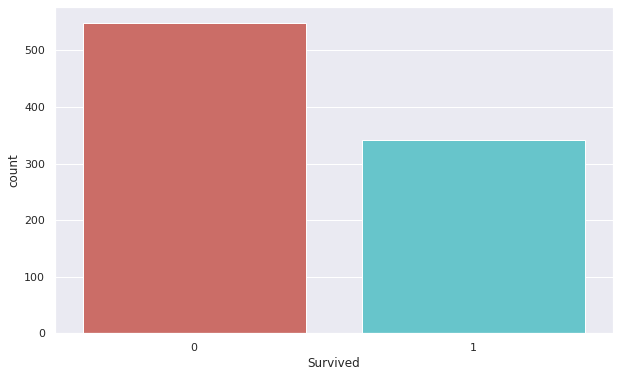

In [ ]:
# Analizando el target 

sns.countplot(x='Survived', data = data, palette = 'hls')

## Análisis de variables categóricas

<AxesSubplot:xlabel='Sex', ylabel='count'>

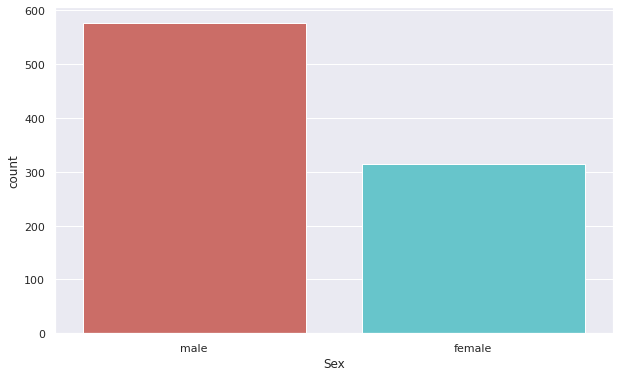

In [ ]:
# Analizando variable categórica
sns.countplot(x='Sex', data = data, palette = 'hls')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

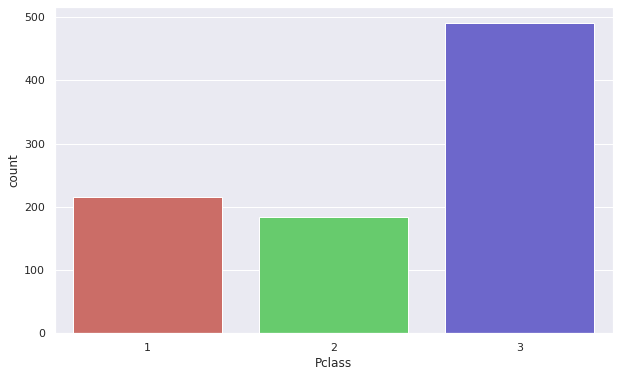

In [ ]:
sns.countplot(x='Pclass', data = data, palette = 'hls')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

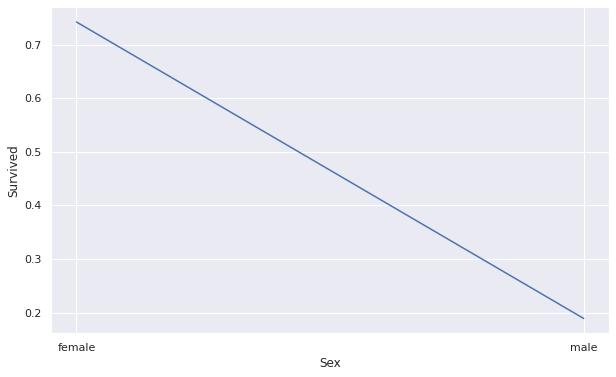

In [ ]:
res = data.groupby(['Sex']).agg({"PassengerId":"count",
                                 "Survived" :"mean"}).reset_index()
                                 
sns.lineplot(x = 'Sex', y = 'Survived', data = res)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

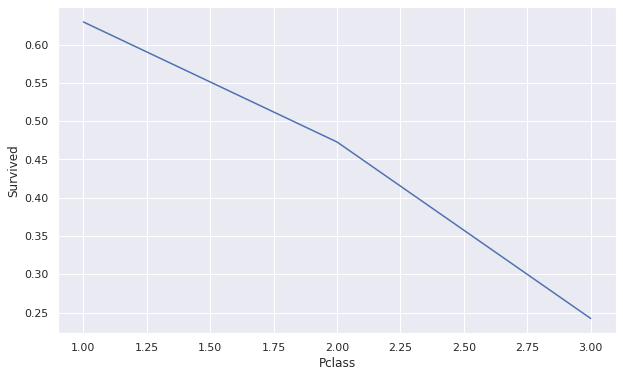

In [ ]:
sns.lineplot(x = 'Pclass', y = 'Survived', data = data.groupby(['Pclass']).agg({"PassengerId":"count", "Survived" :"mean"}).reset_index())

## Análisis de variables numéricas

<AxesSubplot:xlabel='edad_cat', ylabel='Survived'>

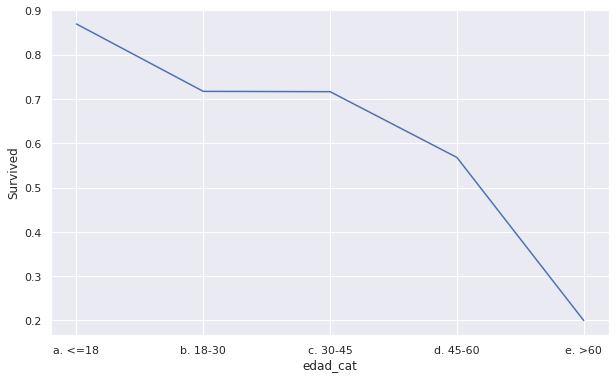

In [ ]:
from math import isnan

def catedad(x):
  if isnan(x):
    return 'missing'
  elif x <= 18:
    return 'a. <=18'
  elif x <= 30:
    return 'b. 18-30'
  elif x <= 45:
    return 'c. 30-45'
  elif x <= 60:
    return 'd. 45-60'
  else:
    return 'e. >60'

temp = data.copy()
temp = temp.dropna()
temp['edad_cat'] = data.Age.apply(lambda x: catedad(x))

sns.lineplot(x = 'edad_cat', y = 'Survived', data = temp.groupby(['edad_cat']).agg({"PassengerId":"count", "Survived" :"mean"}).reset_index())


In [ ]:
temp.groupby(['edad_cat']).agg({"PassengerId":"count", "Survived" :"mean"}).reset_index()

,edad_cat,PassengerId,Survived
0,a. <=18,23,0.869565
1,b. 18-30,46,0.717391
2,c. 30-45,60,0.716667
3,d. 45-60,44,0.568182
4,e. >60,10,0.200000


## Decision Tree

In [ ]:
# identificamos tipos de variables

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']


In [ ]:
# Reemplazando vacios en variables categoricas por el texto "missing"
for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

In [ ]:
# Imputando missings (Solo necesario en la libreria sklearn de python)
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())

---

<h3>One Hot Encoding</h3> 

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---

In [ ]:
# Tratamiento de variables categóricas (Sólo aplica a python sklearn

# One hot Encoding
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder(sparse_output = False)
OneHotEncoder.fit(data[catFeatures])
data[OneHotEncoder.get_feature_names_out(catFeatures).tolist()] = OneHotEncoder.transform(data[catFeatures])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Parch_t,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
OneHotEncoder.get_feature_names_out(catFeatures).tolist()

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_missing']

In [ ]:
#Variables para el modelo
numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Sex_female','Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_missing']

X = data[numFeatures + catFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
# Configuramos el modelo
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 3,
                               min_samples_leaf = 30,
                               min_samples_split = 80)

dtree = dtree.fit(X_train, y_train)  


In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures + catFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [ ]:
dtree.classes_

array([0, 1])

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = dtree.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = dtree.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
pd.crosstab(X_test.prediction, X_test.Survived, margins = True)

Survived,0,1,All
prediction,,,
0,150,37,187
1,20,61,81
All,170,98,268


indicadores del modelo

In [ ]:
from sklearn.metrics import *

In [ ]:
# AUC
print('TRAIN AUC: %f' %(roc_auc_score(y_train, X_train.probability)))
print('TEST AUC: %f' %(roc_auc_score(y_test, X_test.probability)))


TRAIN AUC: 0.854400
TEST AUC: 0.846669


In [ ]:
# GINI
print('TRAIN GINI: %f' %(roc_auc_score(y_train, X_train.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(y_test, X_test.probability)*2-1))


TRAIN GINI: 0.708800
TEST GINI: 0.693337


In [ ]:
# ACCURACY
print('TRAIN ACCURACY: %f' %(accuracy_score(y_train, X_train.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(y_test, X_test.prediction)))


TRAIN ACCURACY: 0.805778
TEST ACCURACY: 0.787313


In [ ]:
# MISSCLASIFICACION
print('TRAIN MISSCLASIFICACION: %f' %(1 - accuracy_score(y_train, X_train.prediction)))
print('TEST MISSCLASIFICACION: %f' %(1 - accuracy_score(y_test, X_test.prediction)))


TRAIN MISSCLASIFICACION: 0.194222
TEST MISSCLASIFICACION: 0.212687


In [ ]:
# PRECISION
print('TRAIN PRECISION: %f' %(precision_score(y_train, X_train.prediction)))
print('TEST PRECISION: %f' %(precision_score(y_test, X_test.prediction)))

TRAIN PRECISION: 0.825397
TEST PRECISION: 0.753086


In [ ]:
# RECALL
print('TRAIN RECALL: %f' %(recall_score(y_train, X_train.prediction)))
print('TEST RECALL: %f' %(recall_score(y_test, X_test.prediction)))

TRAIN RECALL: 0.639344
TEST RECALL: 0.622449


In [ ]:
# F1-SCORE
print('TRAIN F1-SCORE: %f' %(f1_score(y_train, X_train.prediction)))
print('TEST F1-SCORE: %f' %(f1_score(y_test, X_test.prediction)))

TRAIN F1-SCORE: 0.720554
TEST F1-SCORE: 0.681564


In [ ]:
#Resumen de todas las métricas del modelo

metrics_tree = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                             'dt_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                             'dt_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metrics_tree

,metric,dt_train,dt_test
0,AUC,0.854400,0.846669
1,Gini,0.708800,0.693337
2,Accuracy,0.805778,0.787313
3,Precision,0.825397,0.753086
4,Recall,0.639344,0.622449
5,F1-score,0.720554,0.681564


# Regresión logística

In [ ]:
# Creando métricas de las variables

univariate = X.describe().transpose()
univariate.reset_index(inplace = True)
univariate.rename(columns = {'index':'feature',
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3'}, inplace = True)

univariate[['missing_rate']] = 1 - univariate[['count']]/X.shape[0]
univariate.sort_values(by = 'missing_rate', ascending = False, inplace = True)


In [ ]:
# Tratamiento de outliers

# Calculando los intervalos z-score
univariate['li_zscore'] = univariate['mean'] - 2.575*univariate['std']
univariate['ls_zscore'] = univariate['mean'] + 2.575*univariate['std']


# Tratamiento de outliers por Z-score

def zscore(dataframe, univariate, featuresToTreat):
  for col in featuresToTreat:
    desc = univariate.loc[univariate.feature == col]
    dataframe[col + '_tzscore'] = dataframe[col].apply(lambda x: desc.ls_zscore.values[0] if x > desc.ls_zscore.values[0]
                                                            else desc.li_zscore.values[0] if x < desc.li_zscore.values[0]
                                                            else x)
  return dataframe



In [ ]:
X = zscore(X, univariate, ['Age_t','Fare_t','SibSp_t','Parch_t'])

<ipython-input-179-9b6643b6ebff>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col + '_tzscore'] = dataframe[col].apply(lambda x: desc.ls_zscore.values[0] if x > desc.ls_zscore.values[0]


In [ ]:
#Estandarización de datos
variables = ['Age_t_tzscore','Fare_t_tzscore','SibSp_t_tzscore','Parch_t_tzscore']

X[variables] = (X[variables] - X[variables].mean())/X[variables].std()


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
X[variables].head()

,Age_t_tzscore,Fare_t_tzscore,SibSp_t_tzscore,Parch_t_tzscore
0,-0.570096,-0.634552,0.645784,-0.516067
1,0.683926,1.190046,0.645784,-0.516067
2,-0.256591,-0.615318,-0.560181,-0.516067
3,0.448797,0.671921,0.645784,-0.516067
4,0.448797,-0.611756,-0.560181,-0.516067


In [ ]:
#Variables para el modelo
numFeatures = ['Age_t_tzscore','Fare_t_tzscore','SibSp_t_tzscore','Parch_t_tzscore']
catFeatures = ['Sex_female','Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_missing']

X = X[numFeatures + catFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train))
res = mod.fit()


         Current function value: 0.438502
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      612
Method:                           MLE   Df Model:                           10
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3414
Time:                        14:12:45   Log-Likelihood:                -273.19
converged:                      False   LL-Null:                       -414.80
Covariance Type:            nonrobust   LLR p-value:                 5.424e-55
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.4557        nan        nan        nan         nan         nan
Age_t_tzscore       -0.5386      0.126     -4.274      0.000      -0.786      -0.292
Fare_t_tzscore       0.0904 

In [ ]:
variables_mod = list(set(numFeatures + catFeatures) - set(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_missing', 'Pclass_3', 'Parch_t_tzscore', 'Fare_t_tzscore']))

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train[variables_mod]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.441156
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3374
Time:                        14:15:40   Log-Likelihood:                -274.84
converged:                       True   LL-Null:                       -414.80
Covariance Type:            nonrobust   LLR p-value:                 2.070e-58
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.4503      0.201    -12.181      0.000      -2.845      -2.056
Sex_female    

In [ ]:
from math import exp

# Usando el modelo para predecir

X_train['XB'] = -2.4503 + 2.8410*X_train.Sex_female + 2.2277*X_train.Pclass_1 - 0.5618*X_train.Age_t_tzscore + 1.2307*X_train.Pclass_2 - 0.2769*X_train.SibSp_t_tzscore
X_test['XB'] = -2.4503 + 2.8410*X_test.Sex_female + 2.2277*X_test.Pclass_1 - 0.5618*X_test.Age_t_tzscore + 1.2307*X_test.Pclass_2 - 0.2769*X_test.SibSp_t_tzscore

X_train['probability'] = X_train['XB'].apply(lambda x: 1/(1 + exp(-x)))
X_test['probability'] = X_test['XB'].apply(lambda x: 1/(1 + exp(-x)))

X_train['prediction'] = X_train['probability'].apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test['probability'].apply(lambda x: 1 if x > 0.5 else 0)



In [ ]:
#Resumen de todas las métricas del modelo

metrics_logit = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                             'dt_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                             'dt_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metrics_logit

,metric,dt_train,dt_test
0,AUC,0.857648,0.838158
1,Gini,0.715296,0.676317
2,Accuracy,0.799358,0.794776
3,Precision,0.759091,0.766667
4,Recall,0.698745,0.669903
5,F1-score,0.727669,0.715026


In [ ]:
metrics_tree

,metric,dt_train,dt_test
0,AUC,0.854400,0.846669
1,Gini,0.708800,0.693337
2,Accuracy,0.805778,0.787313
3,Precision,0.825397,0.753086
4,Recall,0.639344,0.622449
5,F1-score,0.720554,0.681564


# KNN

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 30)


In [ ]:
neigh = neigh.fit(X_train, y_train)

In [ ]:
feats = X_train.columns.tolist()

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = neigh.predict_proba(X_train[feats])[:,1]
X_test['probability']  = neigh.predict_proba(X_test[feats])[:,1]

X_train['prediction'] = neigh.predict(X_train[feats])
X_test['prediction']  = neigh.predict(X_test[feats])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metrics_knn = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                             'knn_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                             'knn_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metrics_knn

,metric,knn_train,knn_test
0,AUC,0.846305,0.840424
1,Gini,0.692610,0.680847
2,Accuracy,0.783307,0.779851
3,Precision,0.782609,0.805556
4,Recall,0.602510,0.563107
5,F1-score,0.680851,0.662857


In [ ]:
metrics_logit

,metric,dt_train,dt_test
0,AUC,0.857648,0.838158
1,Gini,0.715296,0.676317
2,Accuracy,0.799358,0.794776
3,Precision,0.759091,0.766667
4,Recall,0.698745,0.669903
5,F1-score,0.727669,0.715026


### Gracias por completar este laboratorio!

---

